In [7]:
from sklearn import ensemble, model_selection, metrics 

import numpy as np
import pandas as pd

In [18]:
from sklearn.datasets import load_digits
X = pd.DataFrame(load_digits().data)
y = pd.DataFrame(load_digits().target)

In [65]:
import math
X.head()
y.head()
X.shape

(1797, 64)

In [72]:
from sklearn.tree import DecisionTreeClassifier
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

rt_classifier = DecisionTreeClassifier()
print(cross_val_score(rt_classifier, X, y, cv=10).mean())

0.8357984070405713


In [73]:
from sklearn.ensemble import BaggingClassifier 
bg_classifier = BaggingClassifier(rt_classifier, n_estimators=100)
print(cross_val_score(bg_classifier, X, y, cv=10).mean())

0.9254524692378873


In [76]:
sqrt_bg_classifier = BaggingClassifier(rt_classifier, n_estimators=100, max_features = int(math.sqrt(X.shape[1])), bootstrap_features = True)
#bg_classifier.fit(X,y)
print(cross_val_score(sqrt_bg_classifier, X, y, cv=10).mean())

0.9327279540801205


In [75]:
rand_rt_classifier = DecisionTreeClassifier(max_features = int(math.sqrt(X.shape[1])))
rand_bg_classifier = BaggingClassifier(rand_rt_classifier, n_estimators=100)
#rf_classifier.fit(X,y)
#rf_classifier.fit(X,y)
print(cross_val_score(rand_bg_classifier, X, y, cv=10).mean())

0.9533996680429633


In [77]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators = 100)
print(cross_val_score(rf_classifier, X, y, cv=10).mean())

0.9500387201705424


In [80]:
import matplotlib.pyplot as plt

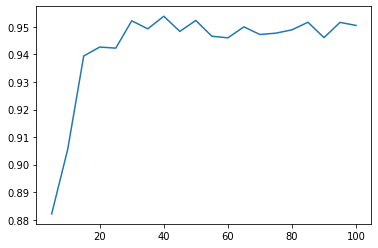

In [81]:
N_estimators = []
Score = []
for j in range(5, 105, 5):
    N_estimators.append(j)
for i in N_estimators:
    rf_classifier = ensemble.RandomForestClassifier(n_estimators = i)
    Score.append(cross_val_score(rf_classifier, X, y, cv=10).mean())

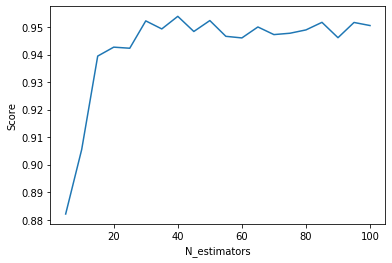

In [82]:
plt.plot(N_estimators, Score)
plt.xlabel('N_estimators')
plt.ylabel('Score')
plt.show()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXoAAAD4CAYAAADiry33AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nO3deXhU9dn/8fedhAQIYQ/7riAiAmoErFWoSwvWatXaSqtVW6W2tYtPvVrtYvvYx59dbGsXbeuCe7VoW2vVR9sHwbUgQQTZEiARCIEkJJCV7PfvjznRaQwwIZNMMvN5XVeunG3m3IcJn5x8z/d8j7k7IiISv5JiXYCIiHQuBb2ISJxT0IuIxDkFvYhInFPQi4jEuZRYF9Da0KFDfcKECbEuQ0SkR1mzZs0+d89sa123C/oJEyaQnZ0d6zJERHoUM9txqHVquhERiXMKehGROKegFxGJcwp6EZE4p6AXEYlzCnoRkTinoBcRiXMKeukWmpudv75VQG5RZaxLEYk73e6GKUk8FbUNfGvpOv61qYiM3ik8cNWpZE0YHOuyROKGzuglpnKLKvnk717npS3F/Ne5U8jsl8YV97/Ja1v3xbo0kbihoJeYeXZ9IZ+863Uqahv50zVz+PrZk/nzl05j/JC+fOHB1fxz495YlygSFxT00uUam5q57blNXP+ntUwdkcFzX/8wcyYNASAzI40nFs9l2qj+fPmxt3h67e4uqyuvpIqK2oYu259IV1HQCwDVdY184revsfjhbDYWlnfafvZV1XH5/au499V8Pn/aeJ5YfBrD+/f+j20G9k3l0WvmcOqEQdyw9G0eW3XIsZqioq6xiZ/87xbO+eXLfPKu1ymqqO3U/Yl0NQW9AHDX8m28s7ucf28v5eO/eY0vPZLNpsKKqO7jrZ37Of83r7F25wF+celMbr1wOqkpbf8I9ktL4cGrZ/OR44bxvb9t4J5Xtke1lhYbC8u54Lev84eXt7Nw+kiKymu57J6V7Ck/2Cn7k87R2NTMs+sLWZlXGrMa8vdVs2xzEYUHDuLuMaujLdbdCsrKynINU9y13t1XzUd/9QrnzxzJDz9xAktey2fJa/lU1jWy4IQRfOOcyRw/sv9Rv7+789iqnfz3PzYyvH9v/nD5KUwfPSCi19Y3NnPD0rd5bv0evn7Wsdxw7hTM7KhradHY1MzvV2zn18u2Mig9lZ9eciJnTR3Omh1lXLlkNYPTU3l88VxGD+zT4X1J56ltaOLJ7F388ZU8CvYfJCXJ+NVnZvGJmaO6tI7Xt+3jmoeyOdjQBMDg9FROGNWfaaP6c8KoAUwf1Z8JQ9JJSur4z+6hmNkad89qc52CXq55aDX/3l7K8hvnMyxoRimvaeD+1/N5IAj8hdNDgT91RPsCv7ahiR88vYEn1xQwb0omv75sFgP7prbrPZqanZv/up6l2QV84fSJ/OD84zsU9tuKq/jWk+tYt+sA588YyY8vnM6g9PdrWrtzP5+//00G9O3F49fOZezgvke9L+kcFbUNPLpyB0tee5d9VXXMGjuQa8+YxENvvEv2jjJ+9qmZfOqUMV1Sy/9tKuIrf3qLiUPSueUT09heUsWG3eVsLKwgt6iShqZQxqanJnP8yP6cMKo/J4wewAmj+jN5WMYh/6ptrw4HvZktAH4NJAP3uftPWq0fDywBMoEy4HJ3LwjWNQHvBJvudPcLDrcvBX3XWp5TzNUPrObmhVP50rxjPrD+QE196Az/9XepqmvkvBNH8I2zp3DciIwjvveushq+/NgaNuyu4OtnHcs3zplC8lGe0TQ3Oz9+bhMPvP4un8kay/+7+MR2v1dzs/PAG+/ysxe20Cc1mR9fOP2QZ37rCw5w+X2ryOgdCvtxQxT23cG+qjqWvJbPI//eQWVdI2dMHspX5h/L3EmDMTNq6hv50iNreHXrPn78yelcMXd8p9bzj3WF3PDnt5k2qj8PXT37P04YIPQX6dbiSjburmBjYSj8N+2poKY+dOafmpzE5OH9OGFUf6aPHsCMMQOZNXbgUdXSoaA3s2QgFzgXKABWA4vcfVPYNk8Cz7r7Q2Z2FnC1u18RrKty936RFqug7zr1jc0suPMVAF745pmHPbM4UFPP/a/l88Dr71Jd38h5J47kG2dPZsrwtgP/ldwSvv7EWpqanV99ehbnTBve4XrdnV/9K5ffvLSNj88Yya8+PSvis6FdZTXc+OQ6VuWXcdbUYfzk4hPf++vlUDbsLufy+1fRp1cyj187lwlD0zt8DHJ0dpXVcO+refx59S7qm5pZOH0EX553LCeO+WATYG1DE9f/6S3+b3Mx3zvveK49c1Kn1LQ0exc3/WU9WeMHc/9VWWT07hXR65qbnfzSajYWhsJ/U2EFGwsrKKuuZ+bYgfz9q6cfVT0dDfrTgB+5+8eC+ZsB3P32sG02Ah9z9wIL/U1d7u79g3UK+m7qnle28/+e38IDV5/KR44bFtFr9lfXc99reTz4+rvUNDTx8SDwJweB7+7cvWI7d/wzhynDMvjDFacwMcoB+ceXt3P7/27hrKnDuPtzJ9O7V/Iht3V3/rx6Fz9+dhNmxi3nT+PSrDERN/1sKqzgc/etJDUlicevncukzIh/lLvUztIa/ue5TfRKSeK6M49pMwB7otyiSv6wYjt/X1dIksFFJ43mS/OO4ZgjfA4NTc1884m3ee6dPfzXuVP42lnHRuXaTosHX8/nR//YxBmTh3LPFVn0ST30z2Ak3J095bWUH2w46uthHQ36TwEL3P2aYP4KYI67Xx+2zZ+AVe7+azO7GPgLMNTdS82sEXgbaAR+4u5Pt7GPxcBigHHjxp2yY0fndqcTKK6s5aw7XmbOxMHcf9Wp7X79/up67n01j4feCAX++TNG8cUPT+Tu5dv456YiPjFzFD+95ET6pnbOKBuPrdrB95/ewJyJg7nvylPpl/bB/RRX1HLTX9/hpS3FzJ00mJ9/auZRtbdv2VvB5+5dRVKS8fi1czl2WPcJe3fnT2/u5LbnNpNsBgaVtY2cOSWTr84/htkTB0c14LrKWzv3c/fy7fzf5iL69Epm0exxXHvmREYOiPzieGNTM9/+y3r++tZurpt3DN9ZcFxU/i3uWr6Nn7+Yw8dOGM5vFp1EWkrHQj5aOhr0lxI6Ww8P+tnu/rWwbUYBvwMmAq8AlwAnuHu5mY1y90IzmwS8BJzt7ofsK6cz+q5x45PreObtQv55w5kdapIoCw/8+iaSk4zvnnc8Xzh9QqcHzNNrd/OtJ9cxffQAHrr61P+4yPvMukJ+8PQGahuauGnhVK48bUKHejxsLapk0b2rAPjTtXMO2WTVlfaW1/Kdv6zn5dwSPnzsUH72qRlk9E7h0ZU7uf+1PPZV1ZM1fhBf/cixzD8us9sHvrvz6tZ93L1iGyvzyhjQpxdXfWgCV35oAoPT23cBv0Vzs/ODv2/gsVU7uepDE7jl/GlH/XPg7vz8xRzuXrGdT84axR2XziQlufv0UO/0pptW2/cDtrj7By55m9mDhNrynzrU/hT0nW/tzv1cdPcbfHn+MXxnwdSovGdZdT2Pv7mT2RMHc2oXDkj24sa9fO1Pa5mUmc4jX5xDSpLx/b9v4Ln1e5g1diC/+PTMI/6ZH6ltxVV89t6VNDU7j14zp0NdTjvC3XlmXSG3/H0jdY1NfPe847l8zvj/CLDahiaWZu/ijy/nsfvAQY4f2Z+vfuQYFk4fedQXxKPtYH0TGwrLWbfrAOsLylm7az+7yg4yvH8a154xiUWzx5Hexl9q7eXu3PbcZu57Lb9DF/JvfXYTD77xLotmj+O2T07v1K6SR6OjQZ9C6GLs2cBuQhdjP+vuG8O2GQqUuXuzmd0GNLn7LWY2CKhx97pgm38DF4ZfyG1NQd+5mpudi+5+nb0Vtbz0rflR+Y8Ua69uLWHxw2sY1j+NmvomDtTU881zpvClMydF/Ywrf181i+5ZSV1jE49eM4cTRnVtW3hZdT0/eHoDz72zh5PGDeQXl8487HWDhqZm/v52IXev2EZeSTUTh6Zz3bxJXHTSmKh164tEQ1MzOXsrWVdwgPW7yllXcICtxVU0NYfyZ+SA3swcM5CPTM3kkyeNjnpzSPiF/AtmjuIXn55Jrwh/NpqanZv+sp4n1xRwzYcn8r2Pd6x7b2eJRvfK84A7CXWvXOLut5nZrUC2uz8TtOPfDjihppuvBuH+IeCPQDOhu3DvdPf7D7cvBX3nWpq9i28/tZ47PzOLT540OtblRE32u2Vc/eBqRg/swy8/PYtpozrvbHtHaSjsq+ubeOyaORHf/NVRyzYX8Z2/vEP5wfb/Imtqdv65cS93rdjGht0VjBzQm2vPmMRls8dG/TpKS6+SljP1dQUH2FRYQV1jMwAD+/YKdSMcE+pOOGPsAIZlHL4HVLTcvWIbP3shh49OG85vP3vk9vWGpmZu+PPbPLt+D984ezLfPGdytwx50A1TEqiobeCsO1Ywfkg6T113Wrf9gT1albUN9OmV3CXtprvKarjsnpVU1jbwyBfnMPMo+z5HorK2gR8/u4ml2QVMHZHRoV9k7s4rW/dx1/JtvJlfxuD0VL5w+gSuOG0CA/ocuXugu1NR20hpVR1l1fXsq6qnrLqe0qo6SqvryS2q5J2CcirrGgHom5rM9FEDmDk2FOozxwxk7OA+Mf3Ze+D1fP77H5uYNyWTP1x+yiF7zNQ2NPHVx95i2ZZivnveVBaf+cH7TLoTBb0A8D/PbuL+1/P5x/Uf7rKz0HhWsL+GRfeu5EB1Aw99cTYnjxsU9X38e3spNz65jj3lB7lu3jF845zJUWvWyH63jLtXbOelLcX0S0vhitPGc/K4QZRV130gwEur6imtDoV7y52erWX0TmHCkHRmjBnAzLGhUD92WL9uc00g3BNv7uTmv71zyF5b1XWNXPtwNm9sL+2SG6+iQUEvbCuuZMGdr3Jp1lhuv/jEWJcTNwoPHGTRvSsprarnoS+cyinjo3MhurahiZ+9kMOS1/OZMKQvv/j0LE4ZH/1fJBAa2O33K7bz3Dt7CI+D9NRkBvdLZUh6GkP7pTI4PZUh/dIYkp7KkGB5y/fB6ald2uYfDS29tmaMGcCDV89+7y+a8oMNXP3Am7y96wA//9RMLumioRQ6SkGf4Nydzy8J/eCuuHE+Q/qlxbqkuLK3vJZF966kuKKWL88/hlED+zAsozfD+6cxrH9v+vdOaVdTxbpdB/ivpW+zvaSaz582npsWTu20+xHC7SqrYX9NfSjQ09M6fBNQT/DChj187fG1TBmewSNfnPPe/5Xcokp+c9lJLDxxZKxLjJiCPsH9c+NeFj+yhh9+YhpXnz4x1uXEpeKKWq5+cDUb2xjaOS0lieH9g+DP6M2w/mkM79+bYRnvfx/Wvzd9eiXzu5e2cteK7QzLSOPnn5rJhycPjcHRJJblW4q57tE1jB/SF3fYWVbDH644JeK7xbsLBX0Cq21o4txfvUyfXsk89/UzIu5SJkenuq6R4so6iitqKQq+F1fWUVRRS1EwXVxRR1VwsTJcSpLR2OxcfPJofviJEyK6OCrR8ca2fVzzcDYG3HflqZx2zJBYl9Ruhwv6nt+JWg7rvlfz2FV2kMeumaOQ7wLpaSlMTEs54vg+Lb8QWn4BlFTWUVxZx+wJg6MyAJy0z4eOHcqzX/swZhb1sZm6AwV9HCs8cJC7lm9n4fQRnH6smgC6k0h/IUjX6a4D1kWDTvHi2O3/u4Vmd7573vGxLkVEYkhBH6fezC/jH+sKuW7eMXpCkkiCU9DHoaZm54fPbGT0wD5c18ZTo0QksSjo49Djb+5k854Kvvfx4xOiL7SIHJ6CPs4cqKnnjn/mcNqkISycPiLW5YhIN6CgjzO//FculbWN/PCCaXE3aJmIHB11r+wm8vdVc88r2zlY38SAPr1CX31T35/u04uBfd+fbus5qZv3VPDoyh18/rQJTB0Rm4diiEj3o6CPsf3V9fx62VYeXbmDXslJZGakcaCmnsq6Rg5303JaStIHfgnklVQzoE8vbjhnStcdgIh0ewr6GKlrbOLhN3bw25e2UlXXyGdOHcsN50xhWP/QAxiam53K2kbKDzZw4GA95QcbQtM1oe8VreYLD9TS2Oz86IITGNBXt86LyPsU9F3M3XnunT389IUt7Co7yLwpmdx83tQPNLUkJRkD+vZiQN9ejEP94EXk6Cnou9CaHfu57blNvLXzAFNHZPDwF2Zz5pTMWJclInEuoqA3swXArwk9M/Y+d/9Jq/XjgSVAJlAGXO7uBWHr+wObgb+5+/VRqr3H2Flaw09f3MJz6/eQmZHGTy4+kUuzxnbLJ++ISPw5YtCbWTJwF3AuUACsNrNn3H1T2GZ3AA+7+0NmdhahB4VfEbb+x8DL0Su7ZyivaeB3y7fy0Bs7SEqCr589mS+dOYn0NP0hJSJdJ5LEmQ1sc/c8ADN7ArgQCA/6acANwfRy4OmWFWZ2CjAceAFoc6zkeFPf2Mxjq3bw62VbKT/YwCUnj+HGjx7HiAFd86R7EZFwkQT9aGBX2HwBMKfVNuuASwg171wEZJjZEGA/8AtCZ/dnH2oHZrYYWAwwbty4SGvvdtydFzcW8dMXtpC/r5oPHTOE7338eE4YpQdxi0jsRBL0bTUkt+7hfSPwOzO7CngF2A00Al8Bnnf3XYe7S9Pd7wHugdATpiKoqdtpbnaueTibl7YUc+ywfiy5KouPHDdMd6eKSMxFEvQFwNiw+TFAYfgG7l4IXAxgZv2AS9y93MxOA84ws68A/YBUM6ty95uiUn03srOshpe2FHPtGRP5zoKppOhpTiLSTUQS9KuByWY2kdCZ+mXAZ8M3MLOhQJm7NwM3E+qBg7t/Lmybq4CseAx5gJyiSgDOnzFKIS8i3coRE8ndG4HrgRcJdZFc6u4bzexWM7sg2Gw+kGNmuYQuvN7WSfV2W7l7Q0F/7LD4fRyZiPRMEfXzc/fngedbLbslbPop4KkjvMeDwIPtrrCHyCmqZOzgPuo6KSLdjtoYoiS3qJLjhmfEugwRkQ9Q0EdBfWMzeSXVTFHQi0g3pKCPgvx91TQ2O8eNUNCLSPejoI+Clh43OqMXke5IQR8FW4sqSU4yJmWmx7oUEZEPUNBHQc7eSiYOTSct5YOP9xMRiTUFfRSox42IdGcK+g46WN/EjrIaJg/XjVIi0j0p6DtoW3EV7uiMXkS6LQV9B73X40ZdK0Wkm1LQd1BuUSWpKUmMH6wHeItI96Sg76CcvZUcm9lPI1aKSLeldOqg3KJK3RErIt2agr4Dyg82sKe8VnfEiki3pqDvgG3FoQuxx41Q10oR6b4U9B2Qs7cK0Bg3ItK9Keg7ILeokvTUZEYP7BPrUkREDklB3wE5eyuZPDwDM4t1KSIih6Sg7wCNcSMiPUFEQW9mC8wsx8y2mdlNbawfb2bLzGy9ma0wszFhy9eY2dtmttHMrov2AcTKvqo6SqvrdUesiHR7Rwx6M0sG7gIWAtOARWY2rdVmdwAPu/sM4Fbg9mD5HuBD7j4LmAPcZGajolV8LOXuDXrc6IxeRLq5SM7oZwPb3D3P3euBJ4ALW20zDVgWTC9vWe/u9e5eFyxPi3B/PcL7Y9yoa6WIdG+RBO9oYFfYfEGwLNw64JJg+iIgw8yGAJjZWDNbH7zHT929sPUOzGyxmWWbWXZJSUl7jyEmcosqGdS3F5n90mJdiojIYUUS9G11KfFW8zcC88xsLTAP2A00Arj7rqBJ51jgSjMb/oE3c7/H3bPcPSszM7NdBxAruUVVTFGPGxHpASIJ+gJgbNj8GOA/zsrdvdDdL3b3k4DvBcvKW28DbATO6FDF3YC7k7tXY9yISM8QSdCvBiab2UQzSwUuA54J38DMhppZy3vdDCwJlo8xsz7B9CDgdCAnWsXHyp7yWirrGnVHrIj0CEcMendvBK4HXgQ2A0vdfaOZ3WpmFwSbzQdyzCwXGA7cFiw/HlhlZuuAl4E73P2dKB9Dl3vvQqyCXkR6gJRINnL354HnWy27JWz6KeCpNl73L2BGB2vsdlq6Vk7Rc2JFpAeIm+6OXSmnqJLh/dMY2Dc11qWIiByRgv4o5BZVqtlGRHoMBX07NTU7W4uqdEesiPQYCvp22llWQ11js8a4EZEeQ0HfTrlFGuNGRHoWBX07tfS4maweNyLSQyjo2ymnqJJxg/vSNzWinqkiIjGnoG+nUI8bnc2LSM+hoG+H+sZm8kqq1bVSRHoUBX075O+rprHZNZiZiPQoCvp20Bg3ItITKejbIXdvJclJxqTM9FiXIiISMQV9O+QUVTJxaDppKcmxLkVEJGIK+nbYWlSpG6VEpMdR0EfoYH0TO8pq1D4vIj2Ogj5C24qrcIfjRqgPvYj0LAr6CLX0uJmsM3oR6WEU9BHKLaokNSWJ8YP7xroUEZF2iSjozWyBmeWY2TYzu6mN9ePNbJmZrTezFWY2Jlg+y8z+bWYbg3WfifYBdJWcvZUcm9mPlGT9bhSRnuWIqWVmycBdwEJgGrDIzKa12uwO4GF3nwHcCtweLK8BPu/uJwALgDvNbGC0iu9KuUWVuiNWRHqkSE5PZwPb3D3P3euBJ4ALW20zDVgWTC9vWe/uue6+NZguBIqBzGgU3pXKDzawp7xWPW5EpEeKJOhHA7vC5guCZeHWAZcE0xcBGWY2JHwDM5sNpALbj67U2Nna8rAR9bgRkR4okqC3NpZ5q/kbgXlmthaYB+wGGt97A7ORwCPA1e7e/IEdmC02s2wzyy4pKYm4+K6iMW5EpCeLJOgLgLFh82OAwvAN3L3Q3S9295OA7wXLygHMrD/wHPB9d1/Z1g7c/R53z3L3rMzM7teys7WoivTUZEYP7BPrUkRE2i2SoF8NTDaziWaWClwGPBO+gZkNNbOW97oZWBIsTwX+RuhC7ZPRK7tr5eytZMqIDMza+uNGRKR7O2LQu3sjcD3wIrAZWOruG83sVjO7INhsPpBjZrnAcOC2YPmngTOBq8zs7eBrVrQPorPlaowbEenBInrwqbs/DzzfatktYdNPAU+18bpHgUc7WGNM7auqo7S6XnfEikiPpbt/jiB3b9DjRkEvIj2Ugv4I3utxo66VItJDKeiPILeokkF9e5HZLy3WpYiIHBUF/RHk7K1kynD1uBGRnktBfxjuztaiKo1xIyI9moL+MPaU11JZ16g7YkWkR1PQH0bOe2PcKOhFpOdS0B9GS9fKKcMU9CLScynoDyOnqJLh/dMY0LdXrEsRETlqCvrDyC2qVPu8iPR4CvpDaGoOetwo6EWkh1PQH8LOshrqGpuZoguxItLDKegPIUdj3IhInFDQH0Ju0LVy8nCNcSMiPZuC/hByiyoZN7gvfVMjGslZRKTbUtAfgnrciEi8UNC3ob6xmbySao7T0MQiEgcU9G3I31dNY7PrjF5E4oKCvg3vPWxEQS8icSCioDezBWaWY2bbzOymNtaPN7NlZrbezFaY2ZiwdS+Y2QEzezaahXem3L2VJCcZkzLTY12KiEiHHTHozSwZuAtYCEwDFpnZtFab3QE87O4zgFuB28PW/Ry4Ijrldo2cokomDk0nLSU51qWIiHRYJGf0s4Ft7p7n7vXAE8CFrbaZBiwLppeHr3f3ZUBlFGrtMrlFlbpRSkTiRiRBPxrYFTZfECwLtw64JJi+CMgwsyGRFmFmi80s28yyS0pKIn1Zp6ipb2RnWY3a50UkbkQS9G09LNVbzd8IzDOztcA8YDfQGGkR7n6Pu2e5e1ZmZmakL+sU24qrcEddK0UkbkRy22cBMDZsfgxQGL6BuxcCFwOYWT/gEncvj1aRXSm3qApQjxsRiR+RnNGvBiab2UQzSwUuA54J38DMhppZy3vdDCyJbpldJ7eoktSUJMYPUY8bEYkPRwx6d28ErgdeBDYDS919o5ndamYXBJvNB3LMLBcYDtzW8nozexV4EjjbzArM7GNRPoaoytlbyeRh/UhOaqvFSkSk54loxC53fx54vtWyW8KmnwKeOsRrz+hIgV0tt6iSuZMivo4sItLt6c7YMOUHG9hTXqv2eRGJKwr6MFuDoQ/U40ZE4omCPozGuBGReKSgD5O7t5L01GRGD+wT61JERKJGQR8mp6iSKSMyMFOPGxGJHwr6MFuLqjTGjYjEHQV9YG95LaXV9Rw3QkEvIvFFQR9YlV8KwKkTBse4EhGR6FLQB1bmlZLRO4XjR/aPdSkiIlGloA+szCtjzsTBGvpAROKOgh4oqqglf181cyZq6AMRiT8KekLNNoDGuBGRuKSgB1bll5GRlsK0UWqfF5H4o6AndEZ/qtrnRSROJXzQF1fUkldSzdxJ6lYpIvEp4YN+VX4ZgC7EikjcSvigX5lXSr+0FE5Q+7yIxKmED/pV+WVkTRhESnLC/1OISJyKKN3MbIGZ5ZjZNjO7qY31481smZmtN7MVZjYmbN2VZrY1+LoymsV3VEllHduKq9StUkTi2hGD3sySgbuAhcA0YJGZTWu12R3Aw+4+A7gVuD147WDgh8AcYDbwQzMbFL3yO6ZlfBsFvYjEs0jO6GcD29w9z93rgSeAC1ttMw1YFkwvD1v/MeBf7l7m7vuBfwELOl52dKzKKyM9NZnpap8XkTgWSdCPBnaFzRcEy8KtAy4Jpi8CMsxsSISvjZmVeaVkTRis9nkRiWuRJFxbdxF5q/kbgXlmthaYB+wGGiN8LWa22MyyzSy7pKQkgpI6bl9VHVuLq5ij/vMiEuciCfoCYGzY/BigMHwDdy9094vd/STge8Gy8kheG2x7j7tnuXtWZmZmOw/h6LwZ9J9X+7yIxLtIgn41MNnMJppZKnAZ8Ez4BmY21Mxa3utmYEkw/SLwUTMbFFyE/WiwLOZW5pXSNzWZE0cPiHUpIiKd6ohB7+6NwPWEAnozsNTdN5rZrWZ2QbDZfCDHzHKB4cBtwWvLgB8T+mWxGrg1WBZzq/LKOGX8IHqpfV5E4lxKJBu5+/PA862W3RI2/RTw1CFeu4T3z/C7hbLqenKKKrlg1qhYlyIi0ukS8nT2zff6z+tCrIjEv4QM+pV5ZfTplcyJowfGuhQRkU6XoEFfStaEQaSmJOThi0iCSbik219dz5a9lcyZqGYbEUkMCVuG5dgAAAkVSURBVBf0q9R/XkQSTAIGfSm9eyUxY4za50UkMSRc0K8M+s+rfV5EEkVCpd2Bmnq27K1grh4bKCIJJKGC/s38MtxhjtrnRSSBJFTQr8wrIy0liZljNb6NiCSOhAr6VfmlnDxuEGkpybEuRUSkyyRM0JfXNLBpT4W6VYpIwkmYoH/z3VD7vMa3EZFEkzBBvyqvlNSUJGaOVf95EUksCRP0K/NLOXncQHr3Uvu8iCSWhAj68oMNbCysYI76z4tIAkqIoM9+r31eQS8iiSchgn5l0D5/0ji1z4tI4kmIoF+VX8assWqfF5HEFFHQm9kCM8sxs21mdlMb68eZ2XIzW2tm683svGB5qpk9YGbvmNk6M5sf5fqPqKK2gQ27y9VsIyIJ64hBb2bJwF3AQmAasMjMprXa7PvAUnc/CbgMuDtYfi2Au58InAv8wsy69K+I7HfLaHaYqweNiEiCiiR0ZwPb3D3P3euBJ4ALW23jQP9gegBQGExPA5YBuHsxcADI6mjR7bEqr4zU5CROGjeoK3crItJtRBL0o4FdYfMFwbJwPwIuN7MC4Hnga8HydcCFZpZiZhOBU4CxrXdgZovNLNvMsktKStp5CIe3Mq+UWWMH0idV7fMikpgiCXprY5m3ml8EPOjuY4DzgEeCJpolhH4xZAN3Am8AjR94M/d73D3L3bMyMzPbU/9hVdY2sKGwgjka9kBEElhKBNsU8J9n4WN4v2mmxReBBQDu/m8z6w0MDZprbmjZyMzeALZ2qOJ2yN6xn6Zm14VYEUlokZzRrwYmm9lEM0sldLH1mVbb7ATOBjCz44HeQImZ9TWz9GD5uUCju2+KWvVHsDKvlF7JxslqnxeRBHbEM3p3bzSz64EXgWRgibtvNLNbgWx3fwb4FnCvmd1AqFnnKnd3MxsGvGhmzcBu4IpOO5I2rMorY+YYtc+LSGKLpOkGd3+e0EXW8GW3hE1vAk5v43XvAsd1rMSjU1XXyDu7y/nyvGNisXsRkW4jbu+MXRO0z+tCrIgkurgN+pV5paQkGaeMV/u8iCS2uA76GWMG0Dc1otYpEZG4FZdBX13XyDsFGt9GRATiNOjX7NhPo/rPi4gAcRr0q/JLSVb7vIgIEKdBvzKvjBljBpCepvZ5EZG4C/qa+kbW7Tqg58OKiATiLujf2nEgaJ9X/3kREYjDoF+ZF2qfz5qgoBcRgTgM+lX5pUwfPYB+ap8XEQHiLOgP1jfx9q4DarYREQkTV0H/1s79NDQ5c3UhVkTkPXEV9KvySkkyyJqg/vMiIi3iKuhX5pUxffQAMnr3inUpIiLdRtwEfW1DS/u8mm1ERMLFTdBX1DawYPoI5k+J3sPFRUTiQdz0QRyW0ZvfLDop1mWIiHQ7cXNGLyIibYso6M1sgZnlmNk2M7upjfXjzGy5ma01s/Vmdl6wvJeZPWRm75jZZjO7OdoHICIih3fEoDezZOAuYCEwDVhkZtNabfZ9YKm7nwRcBtwdLL8USHP3E4FTgC+Z2YTolC4iIpGI5Ix+NrDN3fPcvR54Ariw1TYO9A+mBwCFYcvTzSwF6APUAxUdrlpERCIWSdCPBnaFzRcEy8L9CLjczAqA54GvBcufAqqBPcBO4A53L2u9AzNbbGbZZpZdUlLSviMQEZHDiiTorY1l3mp+EfCgu48BzgMeMbMkQn8NNAGjgInAt8xs0gfezP0ed89y96zMTHWPFBGJpkiCvgAYGzY/hvebZlp8EVgK4O7/BnoDQ4HPAi+4e4O7FwOvA1kdLVpERCIXSdCvBiab2UQzSyV0sfWZVtvsBM4GMLPjCQV9SbD8LAtJB+YCW6JVvIiIHJm5t26FaWOjUHfJO4FkYIm732ZmtwLZ7v5M0AvnXqAfoWadb7v7P82sH/AAod46Bjzg7j8/wr5KgB0dOagebiiwL9ZFxJCOX8ev4z864929zbbviIJeuo6ZZbt7wjZv6fh1/Dr+6B+/7owVEYlzCnoRkTinoO9+7ol1ATGm409sOv5OoDZ6EZE4pzN6EZE4p6AXEYlzCvoYMbOxwdDOm81so5l9I1g+2Mz+ZWZbg+9x/aRzM0sOhrd+NpifaGarguP/c3CTXlwys4Fm9pSZbQl+Dk5LpM/fzG4IfvY3mNnjZtY73j9/M1tiZsVmtiFsWZufeXCj6W+C4eHXm9nJR7tfBX3sNALfcvfjCd0x/NXgxrObgGXuPhlYFszHs28Am8Pmfwr8Kjj+/YSG14hXvyY0RMhUYCahf4eE+PzNbDTwdSDL3acTuhnzMuL/838QWNBq2aE+84XA5OBrMfD7o96ru+urG3wBfwfOBXKAkcGykUBOrGvrxGMeE/xgnwU8S+ju6X1ASrD+NODFWNfZScfeH8gn6BARtjwhPn/eHxV3MKFHmj4LfCwRPn9gArDhSJ858EdgUVvbtfdLZ/TdQPAwlpOAVcBwd98DEHwfFrvKOt2dwLeB5mB+CHDA3RuD+baGxI4XkwiNB/VA0HR1XzAeVEJ8/u6+G7iD0HhYe4ByYA2J8/mHO9RnHskQ8RFR0MdYMB7QX4BvunvCPJTFzM4Hit19TfjiNjaN1/6/KcDJwO899GS2auK0maYtQTv0hYSGLx8FpBNqqmgtXj//SETt/4OCPobMrBehkH/M3f8aLC4ys5HB+pFAcazq62SnAxeY2buEnlp2FqEz/IHBE8mg7SGx40UBUODuq4L5pwgFf6J8/ucA+e5e4u4NwF+BD5E4n3+4Q33mkQwRHxEFfYyYmQH3A5vd/Zdhq54BrgymryTUdh933P1mdx/j7hMIXYR7yd0/BywHPhVsFs/HvxfYZWbHBYvOBjaRIJ8/oSabuWbWN/i/0HL8CfH5t3Koz/wZ4PNB75u5QHlLE0976c7YGDGzDwOvAu/wfhv1dwm10y8FxhH6z3Cpt/H4xXhiZvOBG939/OAJZE8Quki3Frjc3etiWV9nMbNZwH1AKpAHXE3o5CshPn8z+2/gM4R6oK0FriHUBh23n7+ZPQ7MJzQccRHwQ+Bp2vjMg1+AvyPUS6cGuNrds49qvwp6EZH4pqYbEZE4p6AXEYlzCnoRkTinoBcRiXMKehGROKegFxGJcwp6EZE49/8BMOXdtY29vccAAAAASUVORK5CYII=

In [86]:
N_features = []
Score = []
for j in range(1, 65, 3):
    N_features.append(j)
for i in N_features:
    print(i)
    rf_classifier = ensemble.RandomForestClassifier(n_estimators = 40, max_features = i)
    Score.append(cross_val_score(rf_classifier, X, y, cv=10).mean())

1
4
7
10
13
16
19
22
25
28
31
34
37
40
43
46
49
52
55
58
61
64


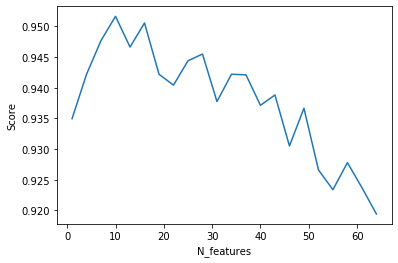

In [87]:
plt.plot(N_features, Score)
plt.xlabel('N_features')
plt.ylabel('Score')
plt.show()

In [95]:
Depth = []
Score = []
for j in range(5, 7):
    Depth.append(j)
Depth.append(40)
Depth.append(50)
for i in Depth:
    print(i)
    rf_classifier = ensemble.RandomForestClassifier(n_estimators = 40, max_features = 10, max_depth = i)
    Score.append(cross_val_score(rf_classifier, X, y, cv=10).mean())
rf_classifier = ensemble.RandomForestClassifier(n_estimators = 40, max_features = 10)
Score.append(cross_val_score(rf_classifier, X, y, cv=10).mean())

5
6
40
50


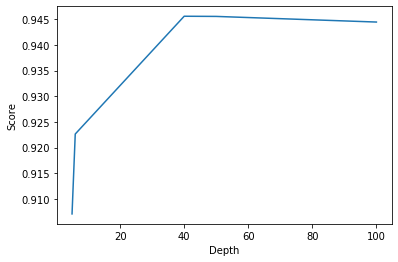

In [96]:
Depth.append(100)
plt.plot(Depth, Score)
plt.xlabel('Depth')
plt.ylabel('Score')
plt.show()